In [16]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from dask.diagnostics import ProgressBar
from geocube.api.core import make_geocube

PATH = "D:\World Bank\CLIENT v2"
DATA_RAW = rf"{PATH}\Data\Data_raw"
DATA_PROC = rf"{PATH}\Data\Data_proc"
DATA_OUT = rf"{PATH}\Data\Data_out"

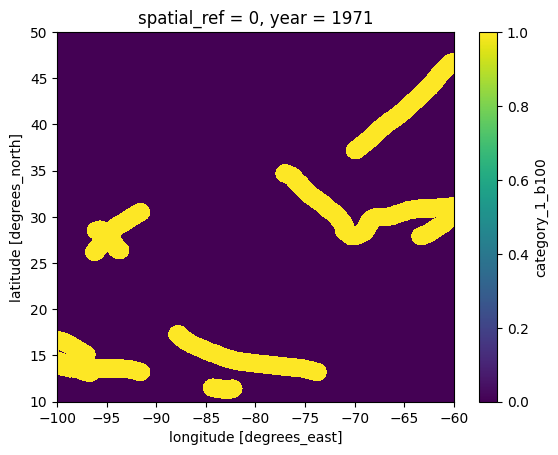

In [14]:
import xarray as xr
ds = xr.open_dataset(r"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_1970_category_1_b100.nc")
# Select Florida
ds = ds.sel(y=slice(50, 10), x=slice(-100, -60))
ds["category_1_b100"].plot()

In [1]:
import xarray as xr
ds = xr.open_dataset(r"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_1970_category_1_b100.nc", chunks={"x": 43200/10, "y": 17173//10})
# # Select Japan 120.937500,20.961441,149.589844,40.713957
# ds = ds.sel(y=slice(40.713957, 20.961441), x=slice(120.937500, 149.589844))
# ds["category_1_b100"].max()

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
ds

<xarray.Dataset> Size: 742MB
Dimensions:          (y: 17173, x: 43200)
Coordinates:
  * y                (y) float64 137kB 83.62 83.61 83.6 ... -59.46 -59.47 -59.48
  * x                (x) float64 346kB -180.0 -180.0 -180.0 ... 180.0 180.0
    spatial_ref      int32 4B ...
    year             int32 4B ...
Data variables:
    category_1_b100  (y, x) bool 742MB ...

In [11]:
ds.coarsen(x=10, y=10, boundary="pad").max()["category_1_b100"].max()

In [9]:
data = ["D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat4_1951_0.25.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat3_1951_0.25.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat2_1951_0.25.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat1_1951_0.25.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat5_1951_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat4_1951_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat3_1951_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat2_1951_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat1_1951_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat5_1951_1.0.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat4_1951_1.0.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat3_1951_1.0.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat2_1951_1.0.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat1_1951_1.0.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat5_1951_0.5.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat4_1951_0.5.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat3_1951_0.5.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat2_1951_0.5.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat1_1951_0.5.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat5_1951_0.25.nc"]

data2 = [
# "D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat2_1952_0.25.nc"
# "D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat1_1952_0.25.nc"
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat5_1952_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat4_1952_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat3_1952_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat2_1952_0.1.nc",
"D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat1_1952_0.1.nc",
# "D:\World Bank\CLIENT v2\Data\Data_proc\hurricanes\IBTrACS_cat3_1952_0.25.nc"
]
import xarray as xr
xr.open_mfdataset([data, data2], combine='nested', concat_dim="year")

ValueError: The supplied objects do not form a hypercube because sub-lists do not have consistent lengths along dimension 0

In [85]:
gdf = gpd.read_file(r"D:\Datasets\International Best Track Archive for Climate Stewardship (IBTrACS)\IBTrACS.ALL.list.v04r01.lines.shp")#, "BASIN", "SUBBASIN", "NAME", "ISO_TIME", "LAT", "LON", "WMO_WIND", "WMO_PRES", "WMO_AGENCY", "TRACK_TYPE"])
gdf["WMO_WIND"] = gdf["WMO_WIND"].ffill()
gdf[gdf.SID == "2021323S10103"].explore(column="WMO_WIND")